In [ ]:
pip install layer-sdk -qqq

In [ ]:
pip install xgboost==1.3.3

In [ ]:
pip install -U ipython -qqq

In [ ]:
import layer
layer.login()

## Fetching the dataset

In [ ]:
transactions = layer.get_dataset("transactions")
transactions_dataset = transactions.to_pandas()
transactions_dataset.head()

,NEWBALANCEDEST,NEWBALANCEORIG,NAMEDEST,OLDBALANCEDEST,STEP,OLDBALANCEORG,AMOUNT,NAMEORIG,ISFLAGGEDFRAUD,TRANSACTIONID,ISFRAUD,TYPE
0,0.0,160296.36,M1979787155,0.0,1,170136.0,9839.64,C1231006815,0,0,0,PAYMENT
1,0.0,19384.72,M2044282225,0.0,1,21249.0,1864.28,C1666544295,0,1,0,PAYMENT
2,0.0,0.00,C553264065,0.0,1,181.0,181.00,C1305486145,0,2,1,TRANSFER
3,0.0,0.00,C38997010,21182.0,1,181.0,181.00,C840083671,0,3,1,CASH_OUT
4,0.0,29885.86,M1230701703,0.0,1,41554.0,11668.14,C2048537720,0,4,0,PAYMENT


### Fetching features

In [ ]:
transaction_features = layer.get_featureset("transaction_features").to_pandas()
transaction_features.head()

,transactionId,errorBalanceDest,errorBalanceOrig,is_fraud,new_balance_dest,new_balance_orig,old_balance_dest,old_balance_orig,type
0,0,9839.64,0.0,0,-1.0,160296.36,-1.0,170136.0,4
1,1,1864.28,0.0,0,-1.0,19384.72,-1.0,21249.0,4
2,2,181.00,0.0,1,-1.0,0.00,-1.0,181.0,0
3,3,21363.00,0.0,1,0.0,0.00,21182.0,181.0,1
4,4,11668.14,0.0,0,-1.0,29885.86,-1.0,41554.0,4


In [ ]:
transaction_features.columns

Index(['transactionId', 'errorBalanceDest', 'errorBalanceOrig', 'is_fraud',
       'new_balance_dest', 'new_balance_orig', 'old_balance_dest',
       'old_balance_orig', 'type'],
      dtype='object')

### Fetch model and make predictions

In [ ]:
fraud_model = layer.get_model("fraud_detection_model")
print(fraud_model.parameters)
print(fraud_model.metrics)

{'test_size': '0.2', 'max_depth': '3', 'random_state': '13', 'objective': 'binary:logitraw'}
{'auprc': [(1635413839555, 1.0)]}


In [ ]:
trained_classifier = fraud_model.get_train()
trained_classifier

In [ ]:
import numpy as np
data = np.array([[9839.64,0,1,19384.72,21182.0,41554.0,4]])

In [ ]:
data

array([[9.839640e+03, 0.000000e+00, 1.000000e+00, 1.938472e+04,
        2.118200e+04, 4.155400e+04, 4.000000e+00]])

In [ ]:
import pandas as pd
test_data = pd.DataFrame(data, columns=['errorBalanceDest','errorBalanceOrig','new_balance_dest','new_balance_orig','old_balance_dest','old_balance_orig','type'])

In [ ]:
test_data

,errorBalanceDest,errorBalanceOrig,new_balance_dest,new_balance_orig,old_balance_dest,old_balance_orig,type
0,9839.64,0.0,1.0,19384.72,21182.0,41554.0,4.0


In [ ]:
import xgboost as xgb


In [ ]:
dtest = xgb.DMatrix(test_data)

In [ ]:
trained_classifier

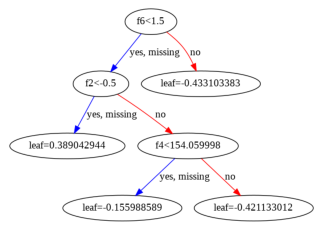

In [ ]:
xgb.plot_tree(trained_classifier, num_trees=2)


In [ ]:
predictions = trained_classifier.predict(dtest)


In [ ]:
dtest.feature_names

['errorBalanceDest',
 'errorBalanceOrig',
 'new_balance_dest',
 'new_balance_orig',
 'old_balance_dest',
 'old_balance_orig',
 'type']

In [ ]:
predictions

array([], shape=(1, 0), dtype=float32)

In [ ]:
!curl --header "Content-Type: application/json; format=pandas-records" \
  --request POST \
  --data '[{"errorBalanceDest":9839.64, "errorBalanceOrig":0, "new_balance_dest":1, "new_balance_orig":19384.72,"old_balance_dest":21182.0,"old_balance_orig":41554.0,"type":4}]' \
https://c2f5f4e0-2017-4ec0-9667-4be8fa92660b.inferences.beta.layer.co/invocations

[-3.594420909881592]